# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Epul Saepulloh
- Email: saepulloh2512@gmail.com
- Id Dicoding: e_saepulloh

## Menentukan Pertanyaan Bisnis

- Bagaimana Trend Pengguna Bike Sharing dalam setiap Bulan pada tahun 2011 dan 2012?
- Bagaimana pengaruh musim terhadap pengguna bike sharing?
- Bagaimana pengaruh cuaca terhadap pengguna bike sharing?
- Bagaimana pengaruh waktu terhadap pengguna bike sharing?
- Apakah suhu, tingkat kelembapan, dan kecepatan angin berpengaruh terhadap pengguna bike sharing?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np, pandas as pd #library untuk komputasi numerik, memanipulasi dan menganalisis data
import matplotlib.pyplot as plt, seaborn as sns #library untuk visualisasi data

## Data Wrangling

### Gathering Data

membaca dataset dalam format csv menggunakan library pandas

In [2]:
df_day = pd.read_csv("data\day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df_hour = pd.read_csv("data\hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data df_day

Periksa tipe data data dari tiap kolom yang terdapat dalam df_day

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, jumlah data pada df_day telah lengkap atau tidak terdapat missing value di dalamnya. Tetapi terdapat masalah dengan tipe data dari kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime bukan object.

Berikutnya, periksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada df_day.

In [5]:
print("Jumlah duplikasi: ",df_day.duplicated().sum())
df_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan pengamatan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada df_day. 

#### Menilai Data df_hour

Periksa tipe data data dari tiap kolom yang terdapat dalam df_hour

In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, jumlah data pada df_hour telah lengkap atau tidak terdapat missing value di dalamnya. Tetapi terdapat masalah dengan tipe data dari kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime bukan object.

Berikutnya, periksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada df_hour.

In [7]:
print("Jumlah duplikasi: ",df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan pengamatan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada df_hour. 

### Cleaning Data

#### Membersihkan data df_day

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, akan diganti tipe data pada kolom dteday menjadi datetime.

In [8]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Membersihkan data df_hour

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday. Untuk mengatasi masalah ini, akan diganti tipe data pada kolom dteday menjadi datetime.

In [10]:
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

In [11]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Eksplorasi Data df_day

In [12]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Sebelum di eksplore dan di visualisasi kembalikan data aslinya sebelum di normalisasi dan mengubah beberapa nama kolom agar mudah dibaca.

In [13]:
df_day = df_day.rename(columns = {"dteday": "date", "yr": "year", "mnth": "month", "hum": "humidity"})
df_day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
df_day.loc[df_day["season"] == 1, "season"] = "Springer"
df_day.loc[df_day["season"] == 2, "season"] = "Summer"
df_day.loc[df_day["season"] == 3, "season"] = "Fall"
df_day.loc[df_day["season"] == 4, "season"] = "Winter"

df_day.season.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\4187045201.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["season"] == 1, "season"] = "Springer"


season
Fall        188
Springer    181
Summer      184
Winter      178
Name: count, dtype: int64

In [15]:
df_day.loc[df_day["year"] == 0, "year"] = "2011"
df_day.loc[df_day["year"] == 1, "year"] = "2012"

df_day.year.value_counts().sort_index()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\1542388114.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["year"] == 0, "year"] = "2011"


year
2011    365
2012    366
Name: count, dtype: int64

In [16]:
df_day.loc[df_day["holiday"] == 0, "holiday"] = "Not a Holiday"
df_day.loc[df_day["holiday"] == 1, "holiday"] = "Holiday"

df_day.holiday.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\823675453.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not a Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["holiday"] == 0, "holiday"] = "Not a Holiday"


holiday
Holiday           21
Not a Holiday    710
Name: count, dtype: int64

In [17]:
df_day.loc[df_day["weekday"] == 0, "weekday"] = "Sun"
df_day.loc[df_day["weekday"] == 1, "weekday"] = "Mon"
df_day.loc[df_day["weekday"] == 2, "weekday"] = "Tue"
df_day.loc[df_day["weekday"] == 3, "weekday"] = "Wed"
df_day.loc[df_day["weekday"] == 4, "weekday"] = "Thu"
df_day.loc[df_day["weekday"] == 5, "weekday"] = "Fri"
df_day.loc[df_day["weekday"] == 6, "weekday"] = "Sat"

df_day.weekday.value_counts().sort_index()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\3629417136.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sun' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["weekday"] == 0, "weekday"] = "Sun"


weekday
Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: count, dtype: int64

In [18]:
df_day.loc[df_day["workingday"] == 0, "workingday"] = "Holiday"
df_day.loc[df_day["workingday"] == 1, "workingday"] = "Working Day"

df_day.workingday.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\1737809740.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["workingday"] == 0, "workingday"] = "Holiday"


workingday
Holiday        231
Working Day    500
Name: count, dtype: int64

In [19]:
df_day.loc[df_day["weathersit"] == 1, "weathersit"] = "Clear"
df_day.loc[df_day["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
df_day.loc[df_day["weathersit"] == 3, "weathersit"] = "Light Snow"
df_day.loc[df_day["weathersit"] == 4, "weathersit"] = "Heavy Rain"

df_day.weathersit.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\2275170563.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["weathersit"] == 1, "weathersit"] = "Clear"


weathersit
Clear            463
Light Snow        21
Mist + Cloudy    247
Name: count, dtype: int64

In [20]:
df_day["temp"] = df_day["temp"].multiply(41)
df_day["atemp"] = df_day["atemp"].multiply(50)
df_day["humidity"] = df_day["humidity"].multiply(100)
df_day["windspeed"] = df_day["windspeed"].multiply(67)

df_day.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,Not a Holiday,Sat,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Berdasarkan rangkuman parameter statistik di atas, dapat diketahui bahwa suhu rata-rata sebesar 20,3°C dengan nilai maksimum sebesar 35,3°C dan nilai minimum sebesar 2,4°C, kemudian diperoleh tingkat kelembapan sebesar 62,8% dengan nilai maksimum sebesar 97,3% dan nilai minimum sebesar 0%, serta diketahui kecepatan angin rata-rata sebesar 12,8 knot dengan nilai maksimum sebesar 34 knot dan nilai minimum sebesar 1,5 knot.

Sekarang coba kita lihat demografi pelanggan casual dan registered berdasarkan musim (season), holiday, workingday, dan cuaca (weathersit). Untuk melakukan ini, digunakan method groupby() yang diikuti dengan method agg().

In [21]:
df_day.groupby(by=["year", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
year season                              
2011 Fall       95450      324200  419650
     Springer   21425      128575  150000
     Summer     77564      269752  347316
     Winter     52813      273324  326137
2012 Fall      130641      510838  641479
     Springer   39197      282151  321348
     Summer    125958      445315  571273
     Winter     76969      438507  515476

Pivot table di atas memberikan gambaran terkait jumlah pengguna bike sharing pada setiap musim. Jika diperhatikan, baik pada tahun 2011 maupun 2012 jumlah pelanggan terbanyak terdapat pada musim gugur (fall), sedangkan pelanggan paling sedikit terdapat pada musim semi (springer). Untuk musim yang lain, bisa dilihat pada gambar pivot table di atas.

In [22]:
df_day.groupby(by=["year", "holiday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
year holiday                                   
2011 Holiday          9748       20274    30022
     Not a Holiday  237504      975577  1213081
2012 Holiday         12611       35802    48413
     Not a Holiday  360154     1641009  2001163

Pivot table di atas memberikan gambaran terkait jumlah pengguna bike sharing hari libur (holiday). Jika diperhatikan, baik pada tahun 2011 maupun 2012 jumlah pelanggan terbanyak terdapat pada bukan hari libur (Not a Holiday).

In [23]:
df_day.groupby(by=["year", "workingday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
year workingday                              
2011 Holiday      128898      257941   386839
     Working Day  118354      737910   856264
2012 Holiday      187834      425596   613430
     Working Day  184931     1251215  1436146

Pivot table di atas memberikan gambaran terkait jumlah pengguna bike sharing hari kerja (Workingday). Jika diperhatikan, baik pada tahun 2011 maupun 2012 jumlah pelanggan terbanyak terdapat pada bukan hari kerja (workingday) jika dibandingkan dengan weekend atau hari libur (holiday).

In [24]:
df_day.groupby(by=["year", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
year weathersit                                
2011 Clear          177272      657795   835067
     Light Snow       1993       23119    25112
     Mist + Cloudy   67987      314937   382924
2012 Clear          269074     1153811  1422885
     Light Snow       1902       10855    12757
     Mist + Cloudy  101789      512145   613934

Pivot table di atas memberikan gambaran terkait jumlah pengguna bike sharing pada beberapa kondisi cuaca (weathersit). Jika diperhatikan, baik pada tahun 2011 maupun 2012 jumlah pelanggan terbanyak terdapat pada bcuaca yang cerah (Clear), dan yang paling sedikit adalah pada cuaca bersalju (light snow).

Last but not least, kita juga bisa mengeksplorasi jumlah pelanggan bike sharing berdasarkan suhu(temp), tingkat kelembapan(humidity), dan kecepatan angin(windspeed). Untuk melakukan hal ini, kita perlu mendefinisikan sebuah kolom baru bernama “temp_group”, "hum_group", dan "windspeed_group". Kolom ini akan membantu kita dalam mengelompokkan pelanggan ke dalam tiga kelompok suhu(temp), yaitu cold (dingin), normal, dan hot(panas). Tiga kelompok windspeed yaitu Light Winds, Moderate Winds, dan Strong Winds. Tiga kelompok humidity yaitu Dry, Normal, dan Wet.

In [25]:
df_day["temp_group"] = df_day.temp.apply(lambda x: "Cold" if x <= 10 else ("Hot" if x > 30 else "Normal"))
df_day.groupby(by=["temp_group"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
temp_group,,,
Cold,7384,93282,100666
Hot,81501,308016,389517
Normal,531132,2271364,2802496


Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak ketika suhu normal.

In [26]:
df_day["windspeed_group"] = df_day.windspeed.apply(lambda x: "Light Winds" if x <= 12 else ("Strong Winds" if x > 22 else "Moderate Winds"))
df_day.groupby(by=["windspeed_group"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
windspeed_group,,,
Light Winds,334328,1436433,1770761
Moderate Winds,267736,1113175,1380911
Strong Winds,17953,123054,141007


Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak ketika kecepatan anginnya rendah (Light Winds).

In [27]:
df_day["hum_group"] = df_day.humidity.apply(lambda x: "Dry" if x <= 30 else ("Wet" if x > 71 else "Normal"))
df_day.groupby(by=["hum_group"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
hum_group,,,
Dry,6591,12795,19386
Normal,451142,1964825,2415967
Wet,162284,695042,857326


Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak ketika tingkat kelembapan normal.

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>]], dtype=object)

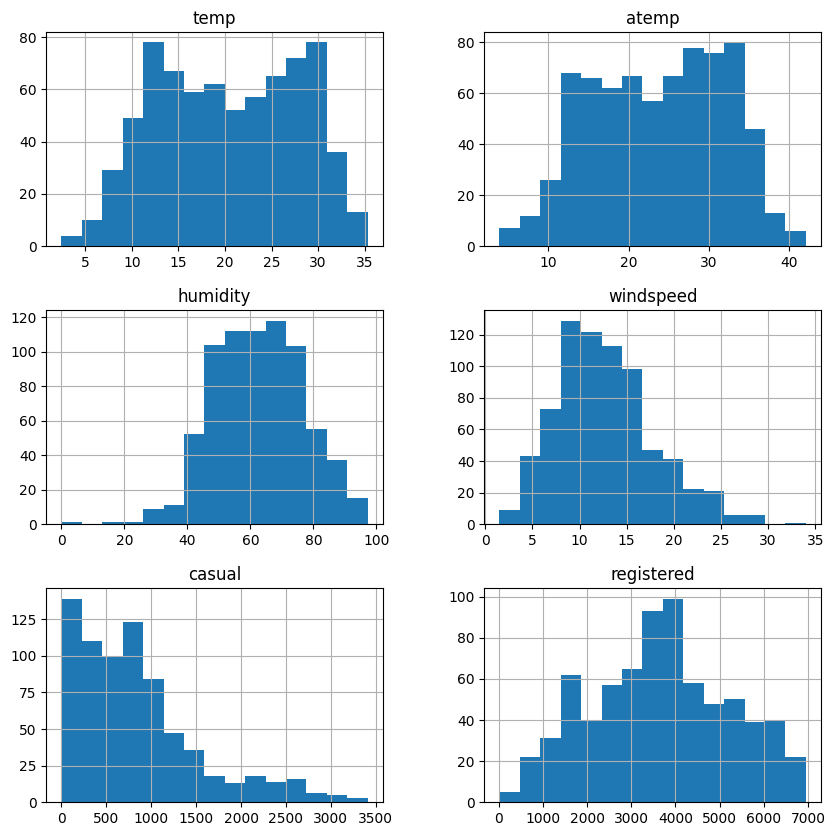

In [28]:
day_num_df = df_day[["temp", "atemp", "humidity", "windspeed", "casual", "registered"]]
day_num_df.hist(bins=15, figsize=(10, 10))

### Eksplorasi Data df_hour

In [29]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Sebelum di eksplore dan di visualisasi kembalikan data aslinya sebelum di normalisasi dan mengubah beberapa nama kolom agar mudah dibaca.

In [30]:
df_hour = df_hour.rename(columns = {"dteday": "date", "yr": "year", "mnth": "month", "hr": "hour", "hum": "humidity"})
df_hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
df_hour.loc[df_hour["season"] == 1, "season"] = "Springer"
df_hour.loc[df_hour["season"] == 2, "season"] = "Summer"
df_hour.loc[df_hour["season"] == 3, "season"] = "Fall"
df_hour.loc[df_hour["season"] == 4, "season"] = "Winter"

df_hour.season.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\1154814321.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["season"] == 1, "season"] = "Springer"


season
Fall        4496
Springer    4242
Summer      4409
Winter      4232
Name: count, dtype: int64

In [32]:
df_hour.loc[df_hour["year"] == 0, "year"] = "2011"
df_hour.loc[df_hour["year"] == 1, "year"] = "2012"

df_hour.year.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\2598505878.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["year"] == 0, "year"] = "2011"


year
2011    8645
2012    8734
Name: count, dtype: int64

In [33]:
df_hour.loc[df_hour["holiday"] == 0, "holiday"] = "Not a Holiday"
df_hour.loc[df_hour["holiday"] == 1, "holiday"] = "Holiday"

df_hour.holiday.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\397930557.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not a Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["holiday"] == 0, "holiday"] = "Not a Holiday"


holiday
Holiday            500
Not a Holiday    16879
Name: count, dtype: int64

In [34]:
df_hour.loc[df_hour["weekday"] == 0, "weekday"] = "Sun"
df_hour.loc[df_hour["weekday"] == 1, "weekday"] = "Mon"
df_hour.loc[df_hour["weekday"] == 2, "weekday"] = "Tue"
df_hour.loc[df_hour["weekday"] == 3, "weekday"] = "Wed"
df_hour.loc[df_hour["weekday"] == 4, "weekday"] = "Thu"
df_hour.loc[df_hour["weekday"] == 5, "weekday"] = "Fri"
df_hour.loc[df_hour["weekday"] == 6, "weekday"] = "Sat"

df_hour.weekday.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\4153882188.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Sun' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["weekday"] == 0, "weekday"] = "Sun"


weekday
Fri    2487
Mon    2479
Sat    2512
Sun    2502
Thu    2471
Tue    2453
Wed    2475
Name: count, dtype: int64

In [35]:
df_hour.loc[df_hour["workingday"] == 0, "workingday"] = "Holiday"
df_hour.loc[df_hour["workingday"] == 1, "workingday"] = "Working Day"

df_hour.workingday.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\3304396880.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["workingday"] == 0, "workingday"] = "Holiday"


workingday
Holiday         5514
Working Day    11865
Name: count, dtype: int64

In [36]:
df_hour.loc[df_hour["weathersit"] == 1, "weathersit"] = "Clear"
df_hour.loc[df_hour["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
df_hour.loc[df_hour["weathersit"] == 3, "weathersit"] = "Light Snow"
df_hour.loc[df_hour["weathersit"] == 4, "weathersit"] = "Heavy Rain"

df_hour.weathersit.value_counts().sort_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13108\2057324049.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["weathersit"] == 1, "weathersit"] = "Clear"


weathersit
Clear            11413
Heavy Rain           3
Light Snow        1419
Mist + Cloudy     4544
Name: count, dtype: int64

In [37]:
df_hour["temp"] = df_hour["temp"].multiply(41)
df_hour["atemp"] = df_hour["atemp"].multiply(50)
df_hour["humidity"] = df_hour["humidity"].multiply(100)
df_hour["windspeed"] = df_hour["windspeed"].multiply(67)

df_hour.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,Not a Holiday,Sat,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [38]:
df_hour["hour_group"] = df_hour.hour.apply(lambda x: "Dini Hari" if x <= 4 else ("Pagi" if x <= 10 else ("Siang" if x <= 15 else ("Malam" if x > 19 else "Sore" ))))
df_hour.groupby(by=["hour_group"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

,casual,registered,cnt
hour_group,,,
Dini Hari,18263,73985,92248
Malam,74213,375335,449548
Pagi,84074,686186,770260
Siang,255412,624042,879454
Sore,188055,913114,1101169


Berdasarkan hasil tersebut diketahui bahwa pelanggan yang paling banyak ketika Sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend Pengguna Bike Sharing dalam setiap Bulan pada tahun 2011 dan 2012?

In [39]:
monthly_orders_df = df_day.resample(rule='M', on='date').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt" : "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B-%Y') #mengubah format order date menjadi nama bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.head()

,date,casual,registered,cnt
0,January-2011,3073,35116,38189
1,February-2011,6242,41973,48215
2,March-2011,12826,51219,64045
3,April-2011,22346,72524,94870
4,May-2011,31050,104771,135821


In [40]:
monthly_orders2011_df = monthly_orders_df.loc[0:11, 'date':'cnt']
monthly_orders2011_df.head()

,date,casual,registered,cnt
0,January-2011,3073,35116,38189
1,February-2011,6242,41973,48215
2,March-2011,12826,51219,64045
3,April-2011,22346,72524,94870
4,May-2011,31050,104771,135821


In [41]:
monthly_orders2012_df = monthly_orders_df.loc[12:24, 'date':'cnt']
monthly_orders2012_df.head()

,date,casual,registered,cnt
12,January-2012,8969,87775,96744
13,February-2012,8721,94416,103137
14,March-2012,31618,133257,164875
15,April-2012,38456,135768,174224
16,May-2012,44235,151630,195865


c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

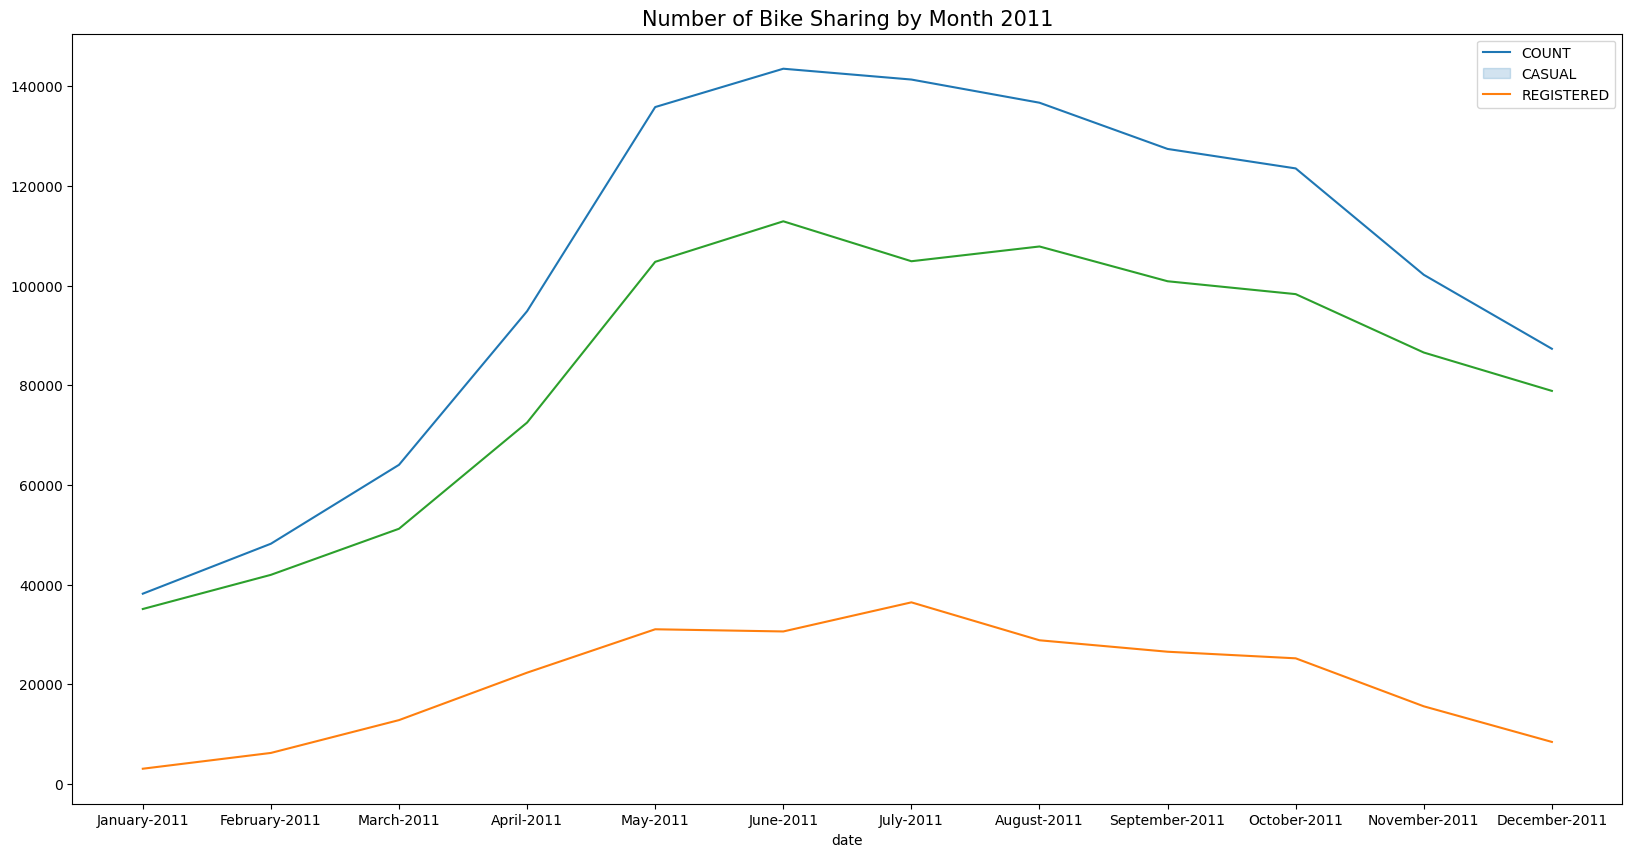

In [42]:
plt.figure(figsize=(20, 10))

sns.lineplot( y="cnt", x="date", data=monthly_orders2011_df)
sns.lineplot( y="casual", x="date", data=monthly_orders2011_df)
sns.lineplot( y="registered", x="date", data=monthly_orders2011_df)
plt.legend(labels=['COUNT','CASUAL', 'REGISTERED'])
plt.ylabel(None)
plt.title("Number of Bike Sharing by Month 2011", loc="center", fontsize=15)
plt.show()

c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

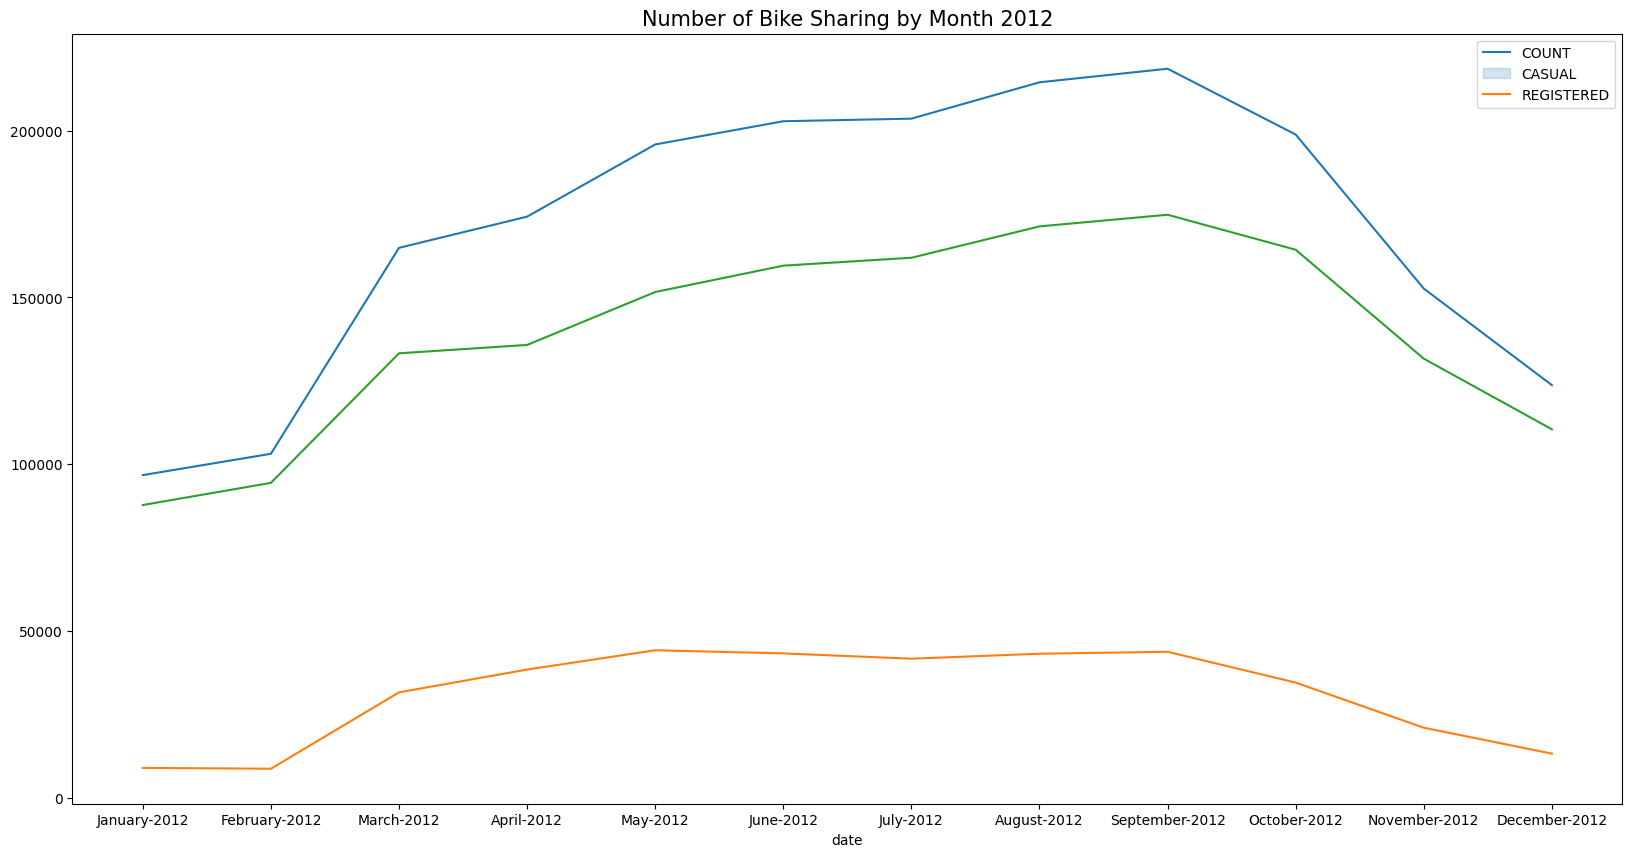

In [43]:
plt.figure(figsize=(20, 10))

sns.lineplot( y="cnt", x="date", data=monthly_orders2012_df)
sns.lineplot( y="casual", x="date", data=monthly_orders2012_df)
sns.lineplot( y="registered", x="date", data=monthly_orders2012_df)
plt.legend(labels=['COUNT','CASUAL', 'REGISTERED'])
plt.ylabel(None)
plt.title("Number of Bike Sharing by Month 2012", loc="center", fontsize=15)
plt.show()

Dari line chart di atas, dapat diketahui bahwa pada setiap awal tahun jumlah pelanggan bike sharing masih sedikit dan terus meningkat setiap bulannya, akan tetapi setelah bulan Oktober terjadi penurunan jumlah pelanggan hingga akhir tahun.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap pengguna bike sharing?

In [44]:
season_df = df_day.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
season_df.head()

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Springer,471348


c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


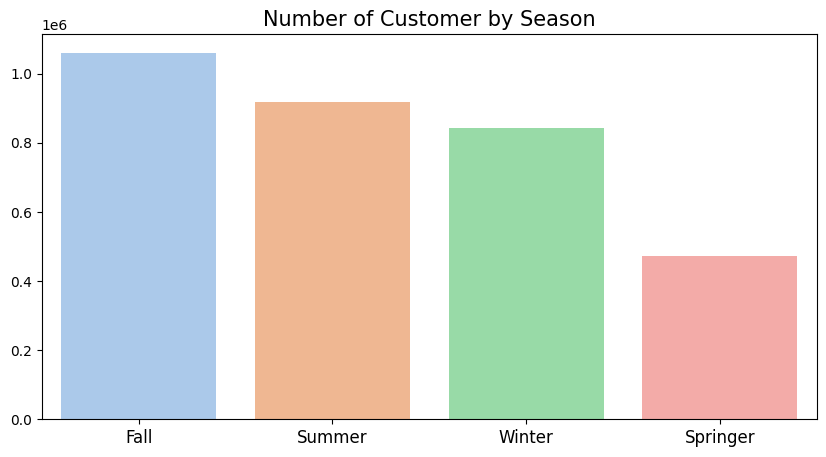

In [45]:
season_df = df_day.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
season_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="customer_count", 
    x="season",
    data=season_df.sort_values(by="customer_count", ascending=False),
    palette= 'pastel'
)
plt.title("Number of Customer by Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari bar chart di atas, dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada musim fall, sedangkan pengguna bike sharing terendah terletak pada musim springer.

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap pengguna bike sharing?

In [46]:
weather_df = df_day.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()
weather_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
weather_df

,weathersit,customer_count
0,Clear,2257952
1,Mist + Cloudy,996858
2,Light Snow,37869


c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


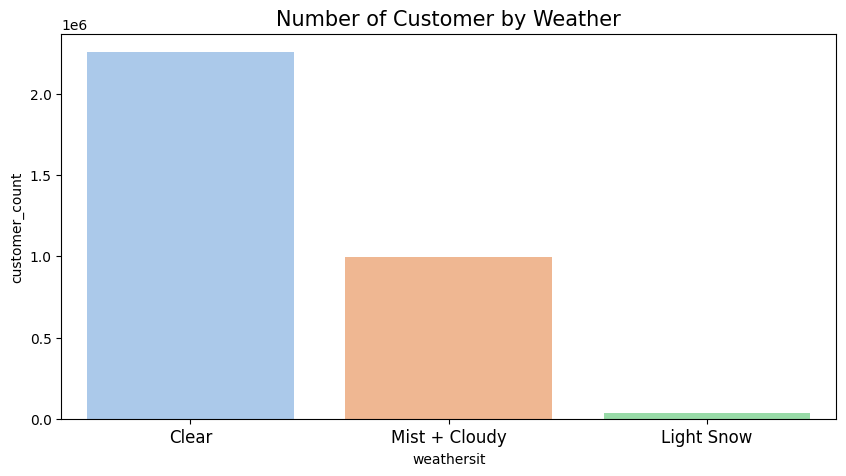

In [47]:
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="customer_count", 
    x="weathersit",
    data=weather_df.sort_values(by="customer_count", ascending=False),
    palette='pastel'
)
plt.title("Number of Customer by Weather", loc="center", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari bar chart di atas, dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada cuaca cerah (clear), sedangkan pengguna bike sharing terendah terletak pada cuaca bersalju (light snow).

### Pertanyaan 4: Bagaimana pengaruh waktu terhadap pengguna bike sharing?

In [48]:
df_hour["hour_group"] = df_hour.hour.apply(lambda x: "Dini Hari" if x <= 4 else ("Pagi" if x <= 10 else ("Siang" if x <= 15 else ("Malam" if x > 19 else "Sore" ))))
hour_df = df_hour.groupby(by=["hour_group"]).cnt.sum().sort_values(ascending=False).reset_index()
hour_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
hour_df

,hour_group,customer_count
0,Sore,1101169
1,Siang,879454
2,Pagi,770260
3,Malam,449548
4,Dini Hari,92248


c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ASUS\anaconda3\envs\proyek_dicoding\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


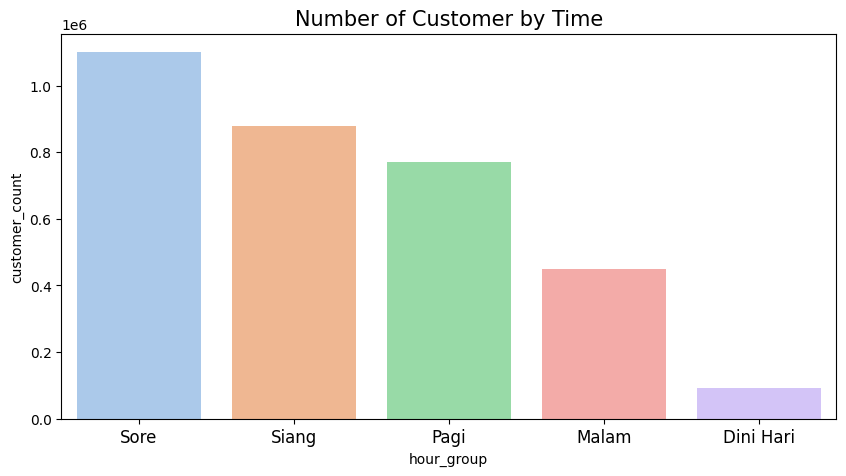

In [49]:
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="customer_count", 
    x="hour_group",
    data=hour_df.sort_values(by="customer_count", ascending=False),
    palette='pastel'
)
plt.title("Number of Customer by Time", loc="center", fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Dari bar chart di atas, dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada sore hari, sedangkan pengguna bike sharing terendah terletak pada dini hari.

### Pertanyaan 5: Apakah suhu, tingkat kelembapan, dan kecepatan angin berpengaruh terhadap pengguna bike sharing?

Analisi regresi

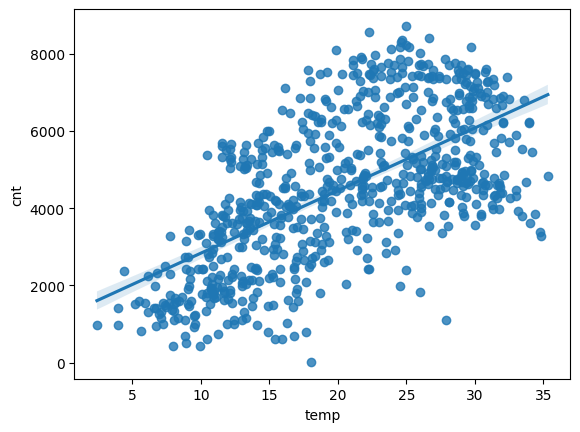

In [50]:
sns.regplot(x=df_day["temp"], y=df_day["cnt"])
plt.show()

In [51]:
df_day["temp_group"] = df_day.temp.apply(lambda x: "Cold" if x <= 10 else ("Hot" if x > 30 else "Normal"))
temp_df = df_day.groupby(by=["temp_group"]).cnt.sum().sort_values(ascending=False).reset_index()
temp_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
temp_df

,temp_group,customer_count
0,Normal,2802496
1,Hot,389517
2,Cold,100666


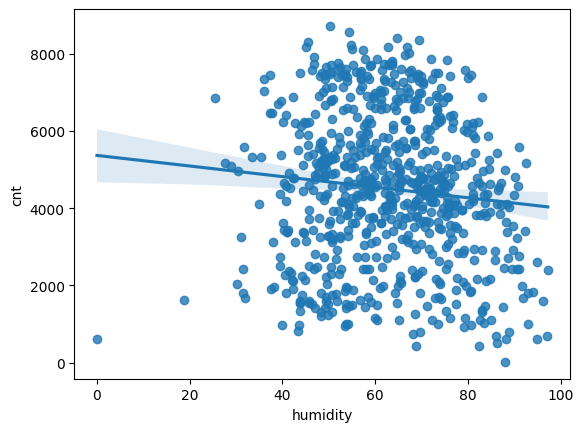

In [52]:
sns.regplot(x=df_day["humidity"], y=df_day["cnt"])
plt.show()

In [53]:
df_day["hum_group"] = df_day.humidity.apply(lambda x: "Dry" if x <= 30 else ("Wet" if x > 71 else "Normal"))
hum_df = df_day.groupby(by=["hum_group"]).cnt.sum().sort_values(ascending=False).reset_index()
hum_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
hum_df

,hum_group,customer_count
0,Normal,2415967
1,Wet,857326
2,Dry,19386


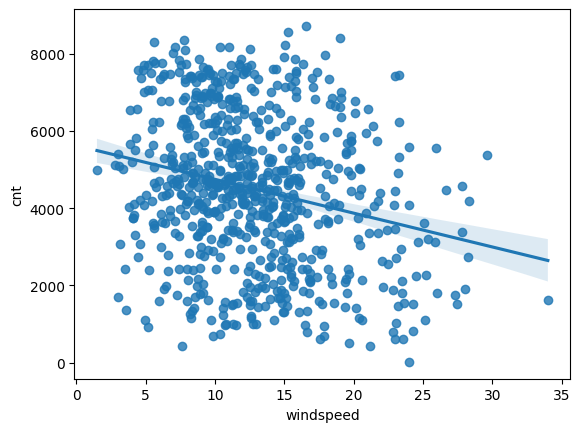

In [54]:
sns.regplot(x=df_day["windspeed"], y=df_day["cnt"])
plt.show()

In [55]:
df_day["windspeed_group"] = df_day.windspeed.apply(lambda x: "Light Winds" if x <= 12 else ("Strong Winds" if x > 22 else "Moderate Winds"))
wind_df = df_day.groupby(by=["windspeed_group"]).cnt.sum().sort_values(ascending=False).reset_index()
wind_df.rename(columns={
    "cnt": "customer_count"
}, inplace=True)
wind_df

,windspeed_group,customer_count
0,Light Winds,1770761
1,Moderate Winds,1380911
2,Strong Winds,141007


## Conclusion

- Berdasarkan hasil pengamatan dari line chart pada `Number of Bike Sharing by Month` pada tahun 2011 dan 2012 bahwa trend pengguna bike sharing pada setiap awal tahun jumlah pelanggan bike sharing masih sedikit dan terus meningkat setiap bulannya, akan tetapi setelah bulan Oktober terjadi penurunan jumlah pelanggan hingga akhir tahun. 
- Berdasarkan hasil pengamatan dari bar chart pada `Number of Bike Sharing by Season` dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada musim fall, sedangkan pengguna bike sharing terendah terletak pada musim springer. Ini berarti musim berpengaruh terhadap jumlah pengguna bike sharing.
- Berdasarkan hasil pengamatan dari bar chart pada `Number of Bike Sharing by Weather` dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada cuaca cerah (clear), sedangkan pengguna bike sharing terendah terletak pada cuaca bersalju (light snow). Ini berarti cuaca berpengaruh terhadap jumlah pengguna bike sharing.
- Berdasarkan hasil pengamatan dari bar chart pada `Number of Bike Sharing by Time` dapat diketahui bahwa pengguna bike sharing tertinggi terjadi pada sore hari, sedangkan pengguna bike sharing terendah terletak pada dini hari.
- Berdasarkan hasil pengamatan pada tabel `df_day` pada kolom `temp` dan `cnt` memiliki hubungan yang positif, dimana banyak pengguna bike sharing terjadi pada suhu normal yaitu antara 11-30℃. Pada kolom `humidity` dan `cnt` memiliki hubungan yang negatif, dimana banyak pengguna bike sharing terjadi pada tingkat kelembapan normal yaitu antara 31-70%. pada kolom `windspeed` dan `cnt` memiliki hubungan yang negatif, dimana banyak pengguna bike sharing terjadi pada kecepatan angin light wind yaitu berkisar antara 0-12 Knot. Dapat disimpulkan bahwa suhu, tingkat kelembapan, dan kecepatan angin berpengaruh terhadap jumlah pengguna bike sharing.

## Export Dataset

In [56]:
df_day.to_csv("dashboard\main_data.csv", index=False)